# 지도학습 - 분류

## classicification 알고리즘


## 모델 평가
- accuracy

### **1. KNN 모델**

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

#### iris data load

In [3]:
from sklearn import datasets

iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
irisdt = pd.DataFrame(iris['data'], columns = iris['feature_names'])
print(irisdt.shape)

(150, 4)


In [5]:
irisdt.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### data visualization - scatter plot 그리기

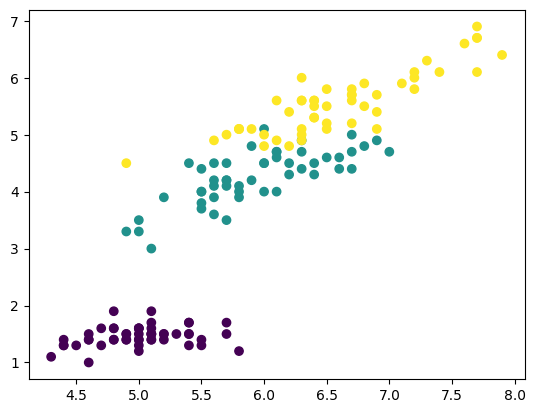

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline

plt.scatter(irisdt['sepal length (cm)'],
            irisdt['petal length (cm)'], c = iris['target'])

### **KNN모델**
1. 전체 데이터로 진행 (train/test 분리안하고)

In [7]:
import pandas as pd
import numpy as np
from sklearn import neighbors

# 1. model 적용
knn = neighbors.KNeighborsClassifier()

# 2. model train - 
knn.fit(iris['data'], iris['target'])

# 3. model scoring(평가)
## train/test 안나눴으므로 그냥 scoring만 한다.
knn.score(iris['data'], iris['target'])

0.9666666666666667

In [8]:
# 모델 accuracy 확인 : 예측값 vs 정답
# data 넣고 예측
pre = knn.predict(iris['data']) # 예측값 (0,1,2)

pre == iris['target'] # 정답(0,1,2)
# 150개 중에 5개 틀림

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,

2. train/test data 분류해서 진행하기

In [9]:
from sklearn.model_selection import train_test_split

iris_x = iris.data
iris_y = iris.target

x_train, x_test, y_train, y_test = train_test_split(iris_x, iris_y, test_size = 0.2, random_state = 0)

In [10]:
len(x_train), len(x_test)

(120, 30)

In [11]:
import pandas as pd
import numpy as np
from sklearn import neighbors

# 1. 모델 적용
knn = neighbors.KNeighborsClassifier()

# 2. 모델 훈련
knn.fit(x_train, y_train)

# 3. 모델 정확도 평가
knn.score(x_test, y_test)

0.9666666666666667

In [12]:
# 모델 정확도 확인 : 예측값 vs 정답
pre = knn.predict(x_test) # test data 넣고 예측
y_test

pre == y_test
# 30개중에 1개 틀

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

### **2. Decision tree**

In [13]:
from sklearn import datasets

iris = datasets.load_iris()

####  train, test data 분류

In [14]:
from sklearn.model_selection import train_test_split

iris_x = iris.data
iris_y = iris.target

x_train, x_test, y_train, y_test = train_test_split(iris_x, iris_y, test_size= 0.2 , random_state=0)

In [15]:
len(x_train), len(x_test)

(120, 30)

#### 1) model 정의

In [16]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)

#### 2) model 학습(train data)

In [17]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

#### 3) predict(test data)

In [18]:
y_pred = clf.predict(x_test)

In [19]:
# 예측 값
y_pred[:5]

array([2, 1, 0, 2, 0])

In [20]:
# 정답
y_test[:5]

array([2, 1, 0, 2, 0])

#### 4) 모델 평가 : 정확도

In [21]:
clf.score(x_test, y_test)
# 100%

1.0

### **Decision Tree 시각화**

In [22]:
from sklearn.tree import export_graphviz

# export_graphviz() 호출 결과 : tree.dot 파일 생성
export_graphviz(clf, out_file='./tree.dot', class_names=iris.target_names, feature_names = iris.feature_names, impurity=True, filled=True)

In [23]:
# pip install graphviz

In [33]:
# path 설정해줘야 graphviz 실행이 된다...
import os
os.environ['PATH'] += os.pathsep+'C:/Program Files (x86)/Graphviz-10.0.1-win64/bin/'

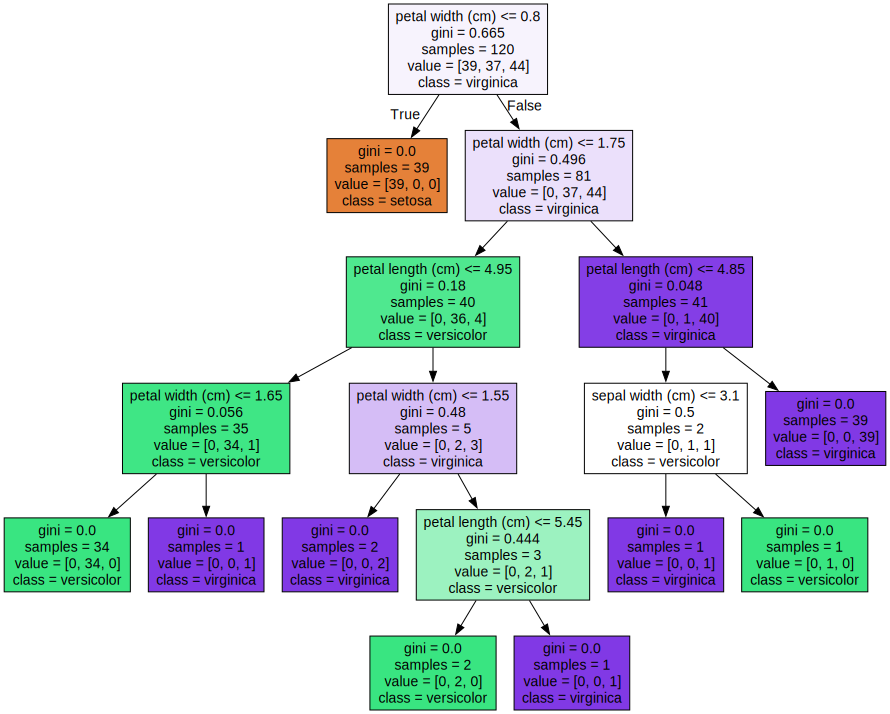

In [34]:
import graphviz

with open('./tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

#### 피처 중요도

feature importance :  [0.    0.013 0.064 0.923]
sepal length (cm) : 0.000
sepal width (cm) : 0.013
petal length (cm) : 0.064
petal width (cm) : 0.923


Text(0.5, 1.0, 'Feature importances')

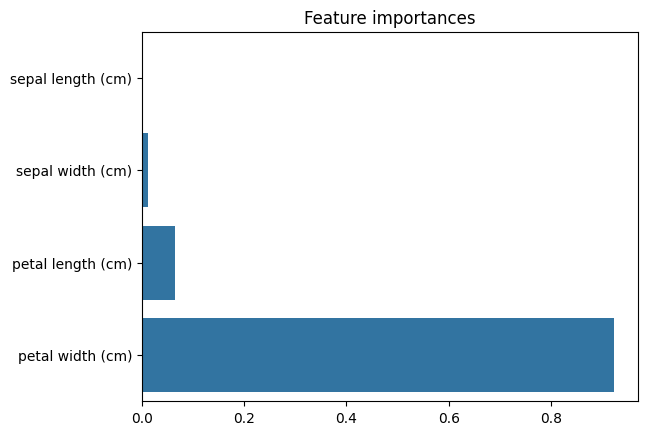

In [37]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# feature importance 추출
print('feature importance : ', np.round(clf.feature_importances_, 3))

# feature 별 importance 매핑
for name, value in zip(iris.feature_names, clf.feature_importances_):
    print('{0} : {1:.3f}'.format(name, value))

# columns 별로 시각화 하기
sns.barplot(x=clf.feature_importances_, y=iris.feature_names)
plt.title('Feature importances')

In [ ]:
# petal width에 많이 의존해서 분류했음을 알수 있다.